<a href="https://colab.research.google.com/github/shreekantpatel1/CE888_project/blob/main/agrotech_assignment_2_sp21356.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, scale
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [ ]:
# Load the data using pandas
sheets = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/agro_tech.xlsx')
sheets.sheet_names

['plants', 'flight dates', 'planting', 'weather']

# **Data Frame of Different Sheets**

In [ ]:
df1 = pd.read_excel(sheets, 'plants')
df2 = pd.read_excel(sheets, 'flight dates')
df3 = pd.read_excel(sheets, 'planting')
df4 = pd.read_excel(sheets, 'weather')

In [ ]:
# info() method is used to get quick description
# like, Number of Rows, Types of Attributes and Number of non-null
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4859 non-null   int64         
 1   Plant Date            4685 non-null   datetime64[ns]
 2   Class                 4859 non-null   int64         
 3   Fresh Weight (g)      4858 non-null   float64       
 4   Head Weight (g)       4754 non-null   float64       
 5   Radial Diameter (mm)  4754 non-null   float64       
 6   Polar Diameter (mm)   4754 non-null   float64       
 7   Diameter Ratio        4752 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4672 non-null   float64       
 10  Leaf Area (cm^2)      4857 non-null   float64       
 11  Square ID             4859 non-null   int64         
 12  Check Date            4859 non-null   datetime64[ns]
 13  Flight Date       

# **Drop Columns**

In [ ]:
# method drop() is used to delete the column from the dataset
# list must follow the order, last index, 'Remove', can  not be mention first or inbetween
# inplace attribute will modify the original dataset, while its True
df1.drop(['Head Weight (g)', 'Diameter Ratio', 'Density (kg/L)', 'Leaf Area (cm^2)', 'Square ID', 'Check Date', 'Remove'], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4859 non-null   int64         
 1   Plant Date            4685 non-null   datetime64[ns]
 2   Class                 4859 non-null   int64         
 3   Fresh Weight (g)      4858 non-null   float64       
 4   Radial Diameter (mm)  4754 non-null   float64       
 5   Polar Diameter (mm)   4754 non-null   float64       
 6   Leaves                100 non-null    float64       
 7   Flight Date           472 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 303.8 KB


# **Rename Columns**

In [ ]:
rename = {'Batch Number' : 'batch', 'Plant Date' : 'planted', 'Class' : 'class', 'Fresh Weight (g)' : 'fresh_w', 'Radial Diameter (mm)' : 'radial_dia', 'Polar Diameter (mm)' : 'polar_dia', 'Leaves' : 'leaves', 'Check Date' : 'checked', 'Flight Date' : 'flighted'}
# Assignning the above variable to change the name of the columns
df1.rename(columns = rename, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   batch       4859 non-null   int64         
 1   planted     4685 non-null   datetime64[ns]
 2   class       4859 non-null   int64         
 3   fresh_w     4858 non-null   float64       
 4   radial_dia  4754 non-null   float64       
 5   polar_dia   4754 non-null   float64       
 6   leaves      100 non-null    float64       
 7   flighted    472 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 303.8 KB


# **Fill Nan**

In [ ]:
# Machine learning donot responde correctly with missing data, so,
# filing data with its Median, and modifying original data

# there was only one missing, so filling with Median
median = df1['fresh_w'].median()
df1['fresh_w'].fillna(median, inplace=True)

# belove attributes are correlated, so filling with Median as well, for no
median = df1['radial_dia'].median()
df1['radial_dia'].fillna(median, inplace=True)

median = df1['polar_dia'].median()
df1['polar_dia'].fillna(median, inplace=True)

median = df1['leaves'].median()
df1['leaves'].fillna(median, inplace=True)

In [ ]:
# number of raws and columns, from its Shape
df1.shape

(4859, 8)

In [ ]:
# adding another column which is total days of plant to flight from planting
df1['grown_up'] = df1['flighted'] - df1['planted']

# **Selact Features and Tune Data**

In [ ]:
df1.drop(['planted', 'flighted'], axis=1, inplace=True)
df1['grown_up'] = df1['grown_up'].astype(int)
df1['grown_up'] = df1['grown_up'].replace(-9223372036854775808, 0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   batch       4859 non-null   int64  
 1   class       4859 non-null   int64  
 2   fresh_w     4859 non-null   float64
 3   radial_dia  4859 non-null   float64
 4   polar_dia   4859 non-null   float64
 5   leaves      4859 non-null   float64
 6   grown_up    4859 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 265.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df1.head()

,batch,class,fresh_w,radial_dia,polar_dia,leaves,grown_up
0,402,3,15.0,109.0,100.0,10.0,0
1,402,4,15.0,109.0,100.0,11.0,0
2,402,1,16.0,109.0,100.0,12.0,0
3,402,3,15.0,109.0,100.0,10.0,0
4,402,3,15.0,109.0,100.0,11.0,0


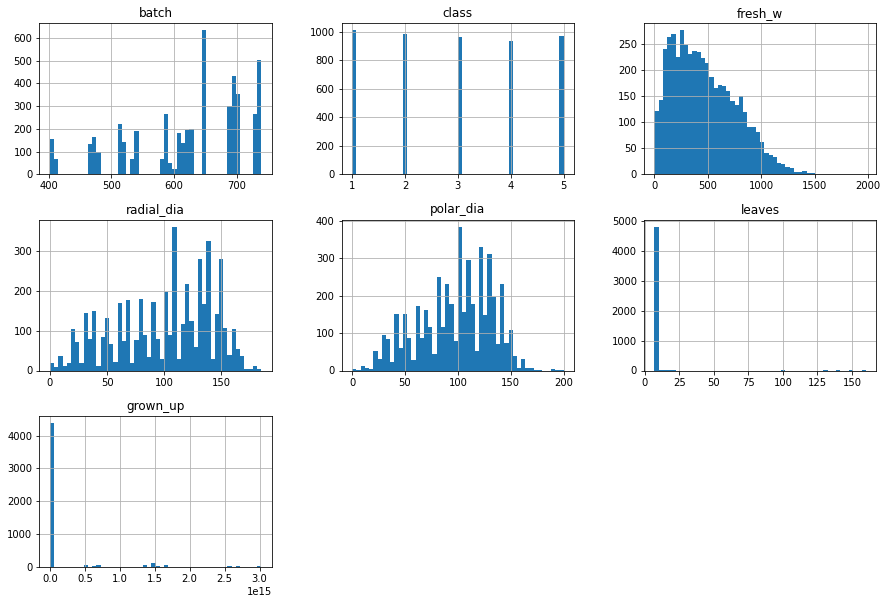

In [ ]:
# plot histogram for each Numerical Attibutes
# which shows the Number of instances have given Range.
df1.hist(bins=50, figsize=(15,10))
plt.show()

# **Correlation between Features**

In [ ]:
# method to find Standard Correlation Coefficient
corr_matrix = df1.corr()
# strong positive correlation between fresh(g) and head(g)
corr_matrix['fresh_w'].sort_values(ascending=False)

fresh_w       1.000000
radial_dia    0.836481
polar_dia     0.752111
grown_up      0.157527
class        -0.024852
leaves       -0.054022
batch        -0.316480
Name: fresh_w, dtype: float64

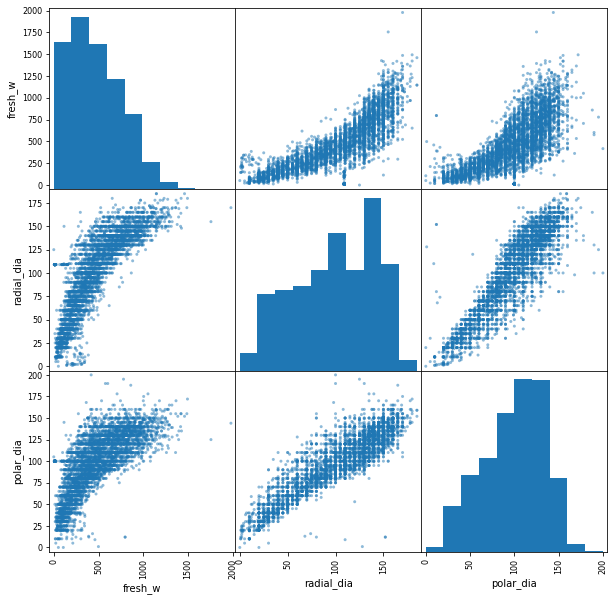

In [ ]:
# visulalizing above correlation using scatter_mattrix
attributes = ['fresh_w','radial_dia', 'polar_dia']
scatter_matrix(df1[attributes], figsize=(10, 10))
plt.show()

# **Define x (dependent variable) and y (independent variable)**

In [ ]:
x = df1.drop(['fresh_w'], axis=1).values
y = df1['fresh_w'].values.T
print(x, y)

[[402.    3.  109.  100.   10.    0. ]
 [402.    4.  109.  100.   11.    0. ]
 [402.    1.  109.  100.   12.    0. ]
 ...
 [738.    3.   60.   80.    9.5   0. ]
 [738.    4.   45.   80.    9.5   0. ]
 [738.    2.   35.  102.    9.5   0. ]] [ 15.  15.  16. ... 280. 247. 183.]


# **Split Data in to test and train Set**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **k_fold cross validation and Get r2_score**

In [ ]:
def get_r2_score (model, x_train, x_test, y_train, y_test):
  #kFold do the same thing as cross_val_score()
  k_fold = KFold(n_splits=11, shuffle=True, random_state=42)
  #fit() actually Trains the Model
  model.fit(x_train, y_train)
  #Cross validation
  cross_val_score(model, x_train, y_train, cv=k_fold, scoring='r2').mean()
  y_predict = model.predict(x_test)

  return  y_predict, r2_score(y_test, y_predict)

In [ ]:
y_pred_lr, scor = get_r2_score(LinearRegression(), x_train, x_test, y_train, y_test)
scor

0.7103581621055342

In [ ]:
y_pred_dt, scor = get_r2_score(DecisionTreeRegressor(), x_train, x_test, y_train, y_test)
scor

0.7960299086401237

# **RMSE**

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred_lr))

159.86505733585489

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred_dt))

134.15477823194476

# **Plot of y_test vs. y_predicted**

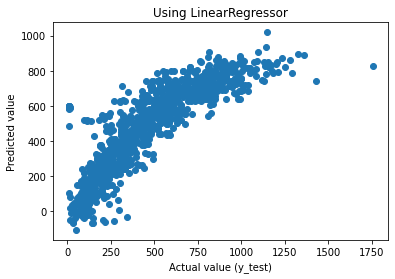

In [ ]:
plt.title('Using LinearRegressor')
plt.xlabel('Actual value (y_test)')
plt.ylabel('Predicted value')
plt.scatter(y_test, y_pred_lr)
plt.show()

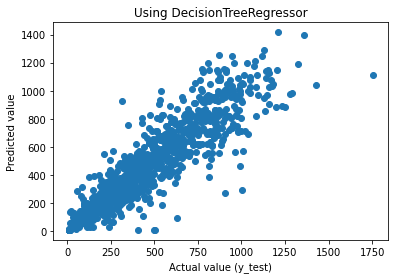

In [ ]:
plt.title('Using DecisionTreeRegressor')
plt.xlabel('Actual value (y_test)')
plt.ylabel('Predicted value')
plt.scatter(y_test, y_pred_dt)
plt.show()

In [ ]:
def get_variation(model):
  model.fit(x_train, y_train)
  return scale(model.coef_), model.intercept_

In [ ]:
# 3 features(independent variables), reggression as equation, m1, m2, m3 are coefficients
# y(dependent variable) = m1x1 + m2x2 + m3x3 + b , b is intercept
m, b = get_variation(LinearRegression())

## **Coefficients (m1, m2, m3, ...)**

In [ ]:
m

array([-0.15235218, -0.24015755,  1.89948362,  0.04684303, -1.51910363,
       -0.03471329])

## **Intercept (b)**

In [ ]:
b

149.2482565977174

# **END**